![](http://)![](http://)*# app Reviews: EDA*

## Introduction

## Loading the Data

In [1]:
#Let's import pandas to read the csv file.
import pandas as pd
df=pd.read_csv("../input/wordembed/ReviewsFinal.csv" , encoding='latin-1')
df.head()


,reviewID,reviewerName,reviewText,reviewerRating,responseDate,reviewLikes,appID,Bug_report \n,Feature_request\n,User_experience \n,Information_seeking\n,Complaints
0,49247,Keith Hutchings,Love this app so simple but does everything I ...,5,10/27/2017 0:00,1,194,0,1,0,1,0
1,49287,Carlos Edwardos,Please listen to your loyal users\nYour app wa...,1,8/2/2016 0:00,7,194,0,0,0,1,0
2,49301,Joe Marino,From 1 to 5 Icon out of my notification tray w...,5,8/4/2016 0:00,3,194,0,0,1,0,0
3,49305,Paul Rogers,Paul\nEverything was good until your last upda...,1,7/28/2016 0:00,5,194,0,0,0,0,0
4,49307,Mike Schneider,Update sucks\nLoved this app before most recen...,1,7/31/2016 0:00,4,194,1,0,0,0,1


In [2]:
#Observing the lables of each column
print(df.keys())

Index(['reviewID', 'reviewerName', 'reviewText', 'reviewerRating',
       'responseDate', 'reviewLikes', 'appID', 'Bug_report \n',
       'Feature_request\n', 'User_experience \n', 'Information_seeking\n',
       'Complaints'],
      dtype='object')


In [3]:
#Observing the shape of our data frame.
df.shape
# Note: We have 12 features and 5283 data points.

(5283, 12)

In [4]:
#Lets check for missing values
df.info()
#Observe tha.t there are no missing values in all column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 12 columns):
reviewID                5283 non-null int64
reviewerName            5283 non-null object
reviewText              5283 non-null object
reviewerRating          5283 non-null int64
responseDate            5283 non-null object
reviewLikes             5283 non-null int64
appID                   5283 non-null int64
Bug_report 
            1671 non-null object
Feature_request
        1672 non-null object
User_experience 
       1673 non-null object
Information_seeking
    1671 non-null object
Complaints              1672 non-null object
dtypes: int64(4), object(8)
memory usage: 495.4+ KB


In [5]:
df.describe()
#Observe that more than 75% of our data is belonging to positive /
#class, i.e. we have imbalanced dataset.

,reviewID,reviewerRating,reviewLikes,appID
count,5283.000000,5283.000000,5283.000000,5283.000000
mean,117934.186258,3.237176,4.338444,1412.018171
std,39500.316556,1.577592,8.843916,835.783252
min,49247.000000,1.000000,1.000000,1.000000
25%,88108.500000,2.000000,1.000000,750.000000
50%,115543.000000,3.000000,2.000000,1410.000000
75%,144488.500000,5.000000,4.000000,2340.000000
max,217282.000000,5.000000,175.000000,2581.000000


In [6]:
#Lets do the value count on 'reviewerRating'.
df.reviewerRating.value_counts()

5    1746
1    1233
4     877
3     777
2     650
Name: reviewerRating, dtype: int64

## Exploratory Data Analysis

Till now we saw that 5-star reviews constitute a large proportion (33%) of all reviews. The next most prevalent rating is 1-stars(23%), followed by 4-star (16%), 3-star (14%), and finally 2-star reviews (12%).<br />
Note that we have We have 12 features and 5283 data points. There are no missing values in 'reviewer rating' & 'Review text' column. we have approximately the same amount of postive and negative reviews of 5 and 1 star hence we can say that our data set is balanced.

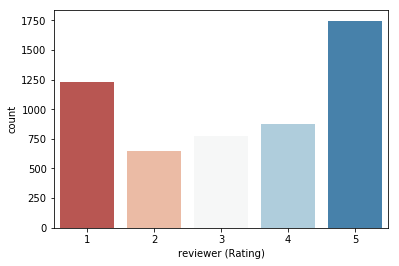

In [7]:
#Importing Seaborn and Matplotlib for graphical effects.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.countplot(x='reviewerRating', data=df, palette='RdBu')
plt.xlabel('reviewer (Rating)')
plt.show()

## Creating a new dataframe

In [8]:
#copying the original dataframe to 'temp_df'.
temp_df = df[['reviewID','reviewerName','reviewText', 'reviewerRating', 'reviewLikes',]].copy()

#Adding new features to dataframe.
temp_df["Sentiment"] = temp_df["reviewerRating"].apply(lambda score: "positive" if score > 3 else \
                                              ("negative" if score < 3 else "not defined"))
temp_df["Usefulness"] = (temp_df["reviewLikes"]/temp_df["reviewLikes"]).apply\
(lambda n: ">75%" if n > 0.75 else ("<25%" if n < 0.25 else ("25-75%" if n >= 0.25 and\
                                                                        n <= 0.75 else "useless")))

temp_df.loc[temp_df.reviewLikes == 0, 'Usefulness'] = ["useless"]
# Removing all rows where 'Score' is equal to 3
#temp_df = temp_df[temp_df.Score != 3]
#Lets now observe the shape of our new dataframe.
temp_df.shape

(5283, 7)

In [9]:
temp_df.describe()

,reviewID,reviewerRating,reviewLikes
count,5283.000000,5283.000000,5283.000000
mean,117934.186258,3.237176,4.338444
std,39500.316556,1.577592,8.843916
min,49247.000000,1.000000,1.000000
25%,88108.500000,2.000000,1.000000
50%,115543.000000,3.000000,2.000000
75%,144488.500000,5.000000,4.000000
max,217282.000000,5.000000,175.000000


In [10]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 7 columns):
reviewID          5283 non-null int64
reviewerName      5283 non-null object
reviewText        5283 non-null object
reviewerRating    5283 non-null int64
reviewLikes       5283 non-null int64
Sentiment         5283 non-null object
Usefulness        5283 non-null object
dtypes: int64(3), object(4)
memory usage: 289.0+ KB


In [11]:
#Lets view the dataframe when Score=5
temp_df[temp_df.reviewerRating == 5].head(10)

,reviewID,reviewerName,reviewText,reviewerRating,reviewLikes,Sentiment,Usefulness
0,49247,Keith Hutchings,Love this app so simple but does everything I ...,5,1,positive,>75%
2,49301,Joe Marino,From 1 to 5 Icon out of my notification tray w...,5,3,positive,>75%
7,49316,Karl Day,I've always used this app and always loved it ...,5,2,positive,>75%
15,49603,Robert Geddes,Great App- It does what I want and its easy to...,5,3,positive,>75%
21,49665,A Google user,Wow talk about service AND and awesome app! Th...,5,2,positive,>75%
25,49699,A Google user,My original problem was addressed. Working gre...,5,5,positive,>75%
26,49700,Peggy Van Sleen,I love this app because it does remind me of m...,5,1,positive,>75%
27,49711,MÎÅ¦ÎÅJÎKÎR,This app is the ultimate notifier!,5,1,positive,>75%
29,49732,K9 Medi,"Great app, one of the best I have had a privil...",5,8,positive,>75%
30,49734,Tim Aries,Exactly what I'm looking for. Simple app that ...,5,1,positive,>75%


## Positive reviews are very common

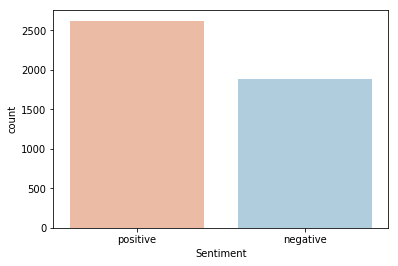

In [12]:
sns.countplot(x='Sentiment', order=["positive", "negative"], data=temp_df, palette='RdBu')
plt.xlabel('Sentiment')
plt.show()

In [13]:
temp_df.Sentiment.value_counts()

positive       2623
negative       1883
not defined     777
Name: Sentiment, dtype: int64

Therefore we could conclude that the positive reviews are a little bit more than the negative reviews.

## Popular words in Review

A look at the post popular words in positive (4-5 stars) and negative (1-2 stars) reviews shows that both positive and negative reviews share many popular words, such as "application", "update", "request", "price", "good", and "product." The words "good", "great", "love", "favorite", and "find" are indicative of positive reviews, while negative reviews contain words such as "didn't" and "disappointed", but these distinguishing words appear less frequently than distinguishing words in positive reviews.

In [14]:
pos = temp_df.loc[temp_df['Sentiment'] == 'positive']
pos = pos[0:25000]

neg = temp_df.loc[temp_df['Sentiment'] == 'negative']
neg = neg[0:25000]

In [15]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import string
import matplotlib.pyplot as plt


def create_Word_Corpus(temp):
    words_corpus = ''
    for val in temp["reviewText"]:
        text = str(val).lower()
        #text = text.translate(trantab)
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        for words in tokens:
            words_corpus = words_corpus + words + ' '
    return words_corpus
        
# Generate a word cloud image
pos_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(pos))
neg_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(neg))

In [16]:
# Plot cloud
def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='w')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

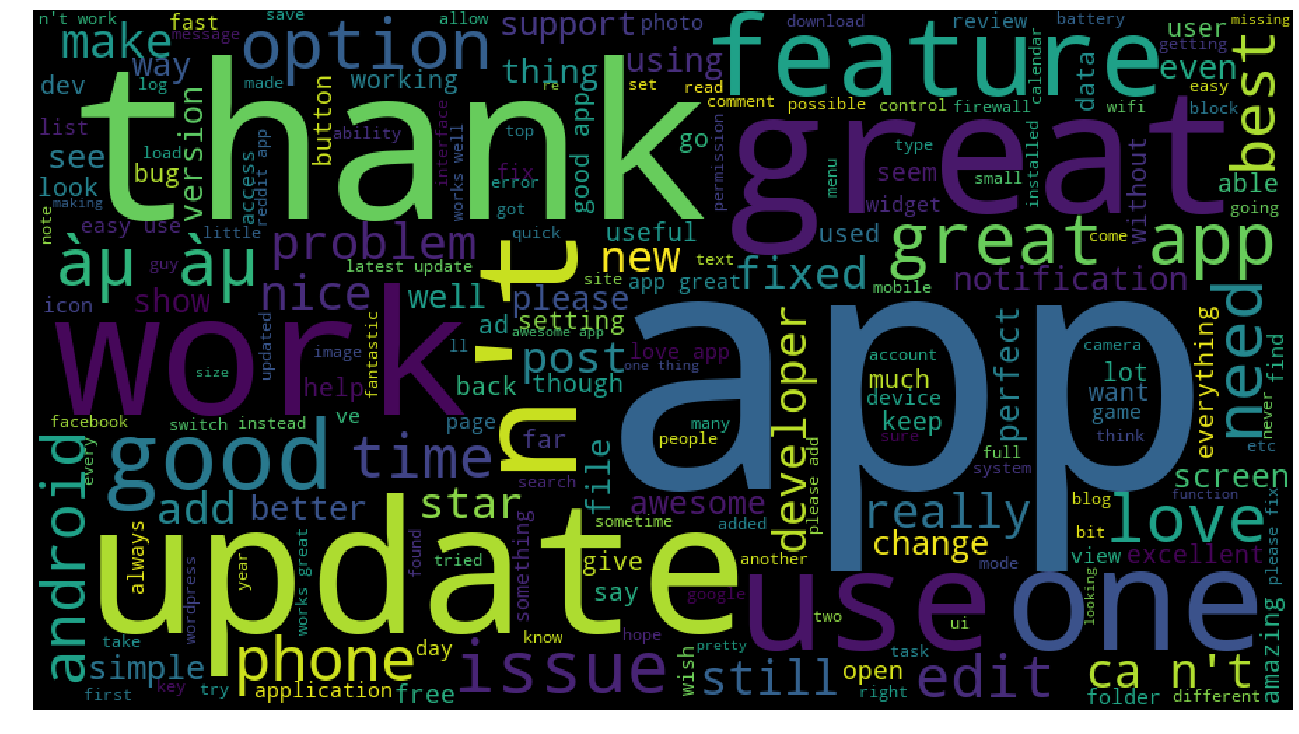

In [17]:
#Visuallizing popular positive words
plot_Cloud(pos_wordcloud)

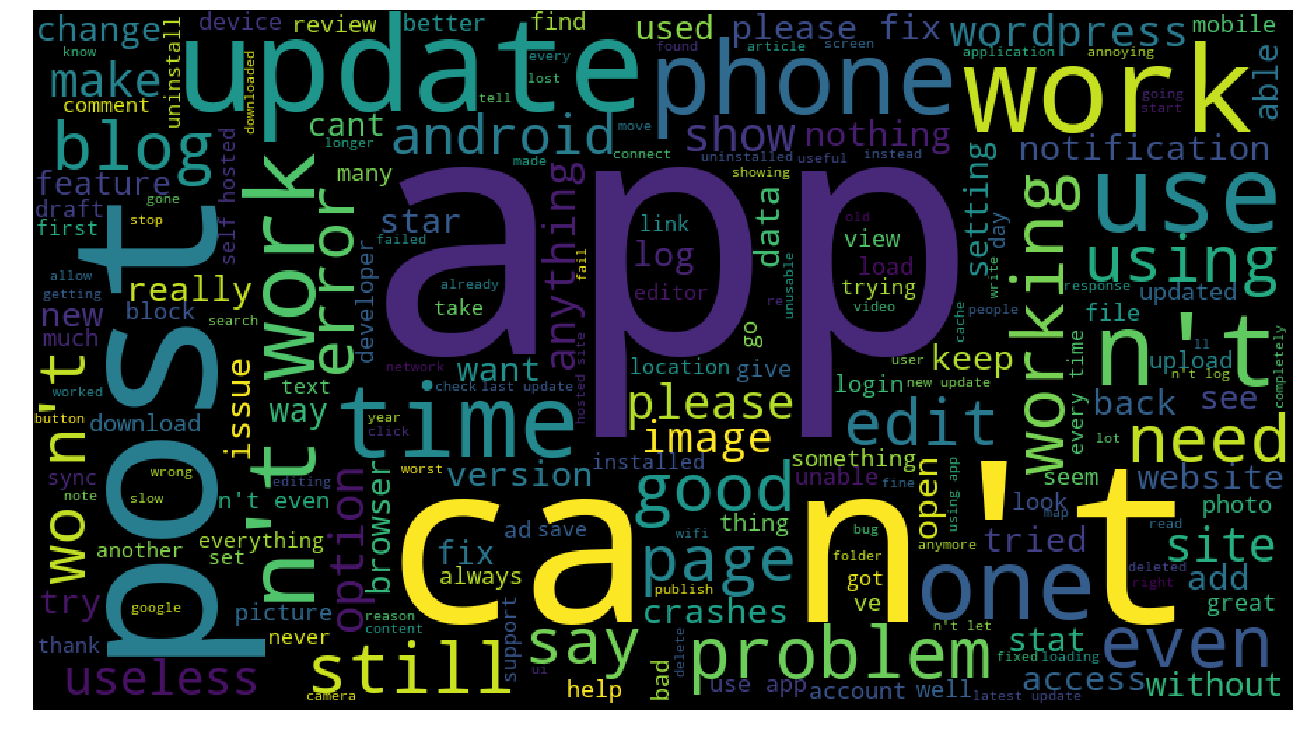

In [18]:
#Visuallizing popular negative words
plot_Cloud(neg_wordcloud)

## Helpfulness

### How many reviews are helpful?

In [19]:
#Checking the value count for 'Usefulness'
temp_df.Usefulness.value_counts()

>75%    5283
Name: Usefulness, dtype: int64

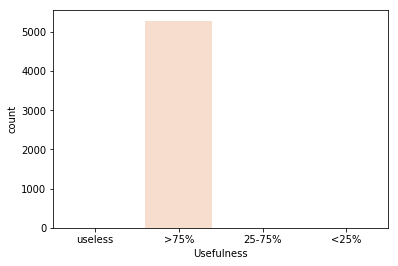

In [20]:
sns.countplot(x='Usefulness', order=['useless', '>75%', '25-75%', '<25%'], data=temp_df, palette='RdBu')
plt.xlabel('Usefulness')
plt.show()

### Positive reviews are found more helpful

As the rating becomes more positive, the reviews become more helpful (and less unhelpful).

In [21]:
temp_df[temp_df.reviewerRating==5].Usefulness.value_counts()

>75%    1746
Name: Usefulness, dtype: int64

In [22]:
temp_df[temp_df.reviewerRating==2].Usefulness.value_counts()

>75%    650
Name: Usefulness, dtype: int64

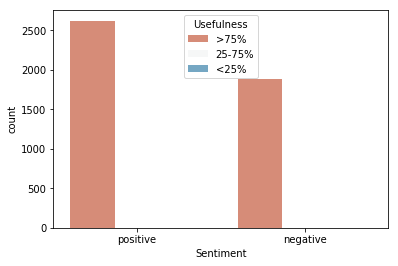

In [23]:
sns.countplot(x='Sentiment', hue='Usefulness', order=["positive", "negative"], \
              hue_order=['>75%', '25-75%', '<25%'], data=temp_df, palette='RdBu')
plt.xlabel('Sentiment')
plt.show()

Therefore positive reviews are more helpful.

## Word Count

In [24]:
temp_df["text_word_count"] = temp_df["reviewText"].apply(lambda text: len(text.split()))

In [25]:
temp_df.head()

,reviewID,reviewerName,reviewText,reviewerRating,reviewLikes,Sentiment,Usefulness,text_word_count
0,49247,Keith Hutchings,Love this app so simple but does everything I ...,5,1,positive,>75%,72
1,49287,Carlos Edwardos,Please listen to your loyal users\nYour app wa...,1,7,negative,>75%,100
2,49301,Joe Marino,From 1 to 5 Icon out of my notification tray w...,5,3,positive,>75%,16
3,49305,Paul Rogers,Paul\nEverything was good until your last upda...,1,5,negative,>75%,84
4,49307,Mike Schneider,Update sucks\nLoved this app before most recen...,1,4,negative,>75%,95


In [26]:
temp_df[temp_df.reviewerRating	==5].text_word_count.median()

22.0

In [27]:
temp_df[temp_df.reviewerRating	==4].text_word_count.median()

30.0

In [28]:
temp_df[temp_df.reviewerRating	==3].text_word_count.median()

28.0

In [29]:
temp_df[temp_df.reviewerRating	==2].text_word_count.median()

29.0

In [30]:
temp_df[temp_df.reviewerRating	==1].text_word_count.median()

23.0

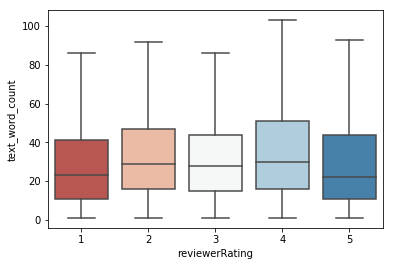

In [31]:
sns.boxplot(x='reviewerRating',y='text_word_count', data=temp_df, palette='RdBu', showfliers=False)
plt.show()

Observations: 5-star reviews had the lowest median word count (22 words), while 4-star reviews had the largest median word count (30 words).

### How does word count relate to helpfulness?

The word counts for helpful reviews and not helpful reviews have a similar distribution with the greatest concentration of reviews of approximately 25 words. However, not helpful reviews have a larger concentration of reviews with low word count and helpful reviews have more longer reviews. Helpful reviews have same median word count (22 words) as not helpful reviews (23 words).

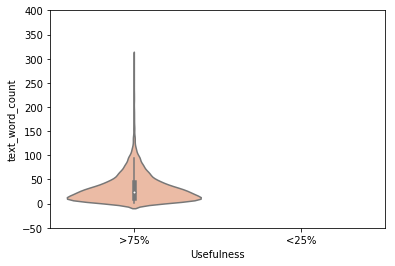

In [32]:
sns.violinplot(x='Usefulness', y='text_word_count', order=[">75%", "<25%"], \
               data=temp_df, palette='RdBu')
plt.ylim(-50, 400)
plt.show()

## Frequency of reviewers

Using Review IDs, one can recognize repeat reviewers. Reviewers that have reviewed over collected application for over 5% of all reviews in the database. We will call such reviewers frequent reviewers. (The cutoff choice of 50, as opposed to another choice, seemed to not have a larger impact on the results.) I asked: Does the behavior of frequent reviewers differ from that of infrequent reviewers?

In [33]:
x = temp_df.reviewID.value_counts()
x.to_dict()
print("converted Series to dictionary")

converted Series to dictionary


In [34]:
temp_df["reviewerName"] = temp_df["reviewID"].apply(lambda counts: "Frequent (>50 reviews)" \
                                                                 if x[counts]>50 else "Not Frequent (1-50)")

In [35]:
temp_df.head()

,reviewID,reviewerName,reviewText,reviewerRating,reviewLikes,Sentiment,Usefulness,text_word_count
0,49247,Not Frequent (1-50),Love this app so simple but does everything I ...,5,1,positive,>75%,72
1,49287,Not Frequent (1-50),Please listen to your loyal users\nYour app wa...,1,7,negative,>75%,100
2,49301,Not Frequent (1-50),From 1 to 5 Icon out of my notification tray w...,5,3,positive,>75%,16
3,49305,Not Frequent (1-50),Paul\nEverything was good until your last upda...,1,5,negative,>75%,84
4,49307,Not Frequent (1-50),Update sucks\nLoved this app before most recen...,1,4,negative,>75%,95


### Are frequent reviewers more helpful?

The distribution of helpfulness for frequent reviewers is similar to that of all reviews. However, frequent reviewers are more likely to have their review voted on and when voted on, more likely to be voted helpful, and less likely to be unhelpful.

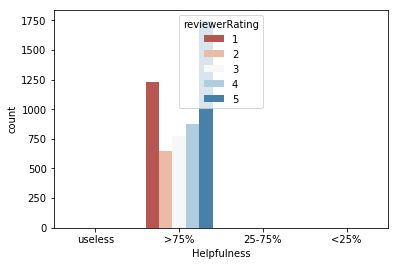

In [36]:
sns.countplot(x='Usefulness', order=['useless', '>75%', '25-75%', '<25%'], \
              hue='reviewerRating', data=temp_df, palette='RdBu')
plt.xlabel('Helpfulness')
plt.show()

### Are frequent reviewers more verbose?

The distributions of word counts for frequent and infrequent reviews shows that infrequent reviewers have a large amount of reviews of low word count. On the other hand, the largest concentration of word count is higher for frequent reviewers than for infrequent reviews. Moreover, the median word count for frequent reviewers is higher than the median for infrequent reviewers.

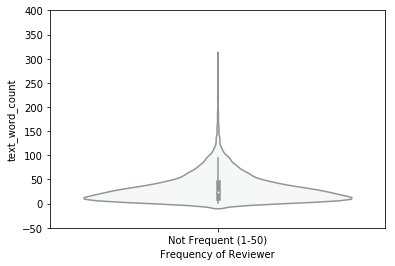

In [37]:
sns.violinplot(x='reviewerName', y='text_word_count',  \
               data=temp_df, palette='RdBu')
plt.xlabel('Frequency of Reviewer')
plt.ylim(-50, 400)
plt.show()

## Conclusion

<pre>
a. Positive reviews are very common.
b. Positive reviews are shorter.
c. Longer reviews are more helpful.
d. Despite being more common and shorter, positive reviews are found more helpful.
e. Frequent reviewers are more discerning in their ratings, write longer reviews, and write more helpful reviews
</pre>